<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#项目：分析数据集_泰坦尼克" data-toc-modified-id="项目：分析数据集_泰坦尼克-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>项目：分析数据集_泰坦尼克</a></span><ul class="toc-item"><li><span><a href="#思路与准备" data-toc-modified-id="思路与准备-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>思路与准备</a></span></li><li><span><a href="#导入数据" data-toc-modified-id="导入数据-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#数据分析与可视化" data-toc-modified-id="数据分析与可视化-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>数据分析与可视化</a></span><ul class="toc-item"><li><span><a href="#缺失数据" data-toc-modified-id="缺失数据-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>缺失数据</a></span></li><li><span><a href="#查看不同数据类型的变量分布情况" data-toc-modified-id="查看不同数据类型的变量分布情况-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>查看不同数据类型的变量分布情况</a></span></li><li><span><a href="#各种类变量与是否生还的关系" data-toc-modified-id="各种类变量与是否生还的关系-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>各种类变量与是否生还的关系</a></span></li><li><span><a href="#进一步整理数据" data-toc-modified-id="进一步整理数据-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>进一步整理数据</a></span></li><li><span><a href="#各因素之间的相关系数" data-toc-modified-id="各因素之间的相关系数-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>各因素之间的相关系数</a></span></li></ul></li><li><span><a href="#初步结论" data-toc-modified-id="初步结论-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>初步结论</a></span></li><li><span><a href="#参考资料" data-toc-modified-id="参考资料-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>参考资料</a></span></li></ul></li><li><span><a href="#建模分析" data-toc-modified-id="建模分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>建模分析</a></span></li></ul></div>

# 项目：分析数据集_泰坦尼克
##  思路与准备
- 问题：
    - 数据特点
    - 那些因素让船上的人生还率更高？
- 数据整理
- 探索阶段
- 结论

![Titanic](http://titanic2ship.com/wp-content/uploads/2013/10/ColorPlans-CyrilCodus-LG.jpg)

>[kaggle_tatanic_data](https://www.kaggle.com/c/titanic/data)

>**Data Dictionary**

>**Variable**	**Definition**	**Key**  
survival	Survival	0 = No, 1 = Yes  
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  
sex	Sex  	
Age	Age in years  	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

>**Variable Notes**

>**pclass**: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

>**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

>**sibsp**: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

>**parch**: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

##  导入数据

In [2]:
filename = 'titanic_data.csv'
data_df = pd.read_csv(filename)

In [3]:
data_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data_df.info()
data_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


数据集有891行12列数据，其中2列浮点型，5列整形，5列文本；  
从数据集看出生还率是**38.38%**，乘客的年龄从0.42到80岁；  
当中5列字符型的数据可以进一步量化，以便于之后建模分析。

##  数据分析与可视化
###  缺失数据

In [5]:
miss_df = data_df.isnull().sum().sort_values(ascending=False)
pd.concat([miss_df, miss_df / len(data_df) * 100], axis=1, keys=['Total','%'])

,Total,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


年龄，船舱号和上船点存的数据存在缺失，其中年龄和船舱号缺失比较多，缺失了19。87%和77.10%。
###  查看不同数据类型的变量分布情况
分3种数据类型，分别是整型，浮点型，文本。

In [6]:
columns = data_df.select_dtypes(include=[np.number]).drop(['PassengerId','Age','Fare'], axis=1).columns.tolist()
columns

['Survived', 'Pclass', 'SibSp', 'Parch']

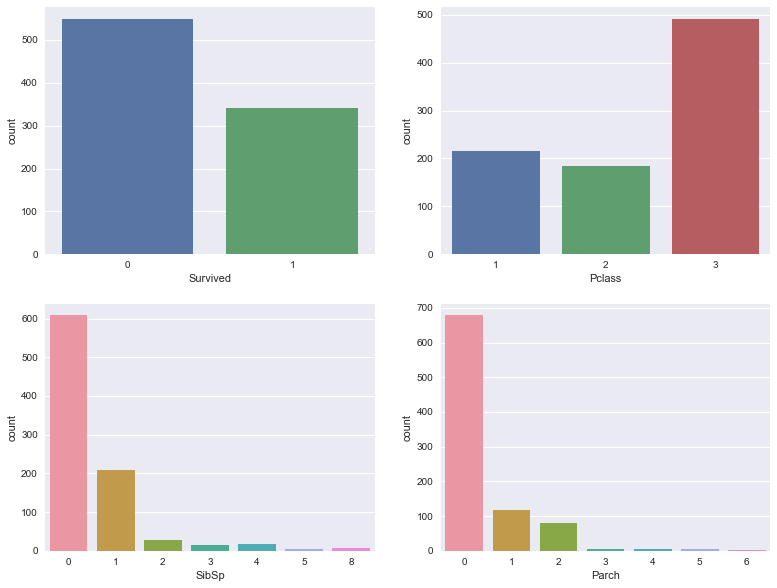

In [7]:
# 整型变量的分布图
# 生还，票级，兄弟姐妹或配偶数，父母或孩子数
fig = plt.figure(figsize=(13, 10))
for i in range(len(columns)):
    fig.add_subplot(2, 2, i+1)
    sns.countplot(x=columns[i], data=data_df)
plt.show()
fig.clear()

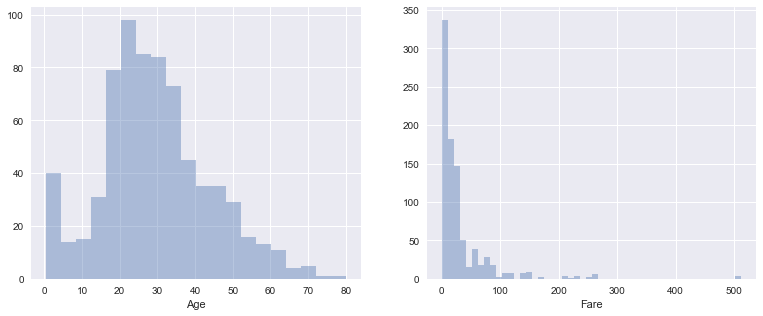

In [8]:
# 浮点型变量的分布图
# 年龄和船费
i = 1
fig = plt.figure(figsize=(13,5))
for col in ['Age','Fare']:
    fig.add_subplot(1, 2, i)
    sns.distplot(data_df[col].dropna(), kde=False)
    i += 1
plt.show()
fig.clear()

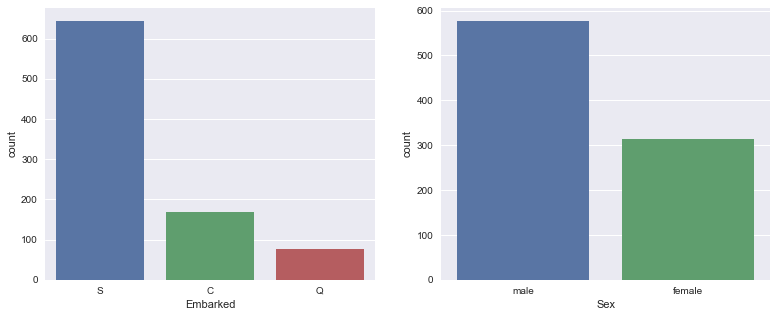

In [9]:
# 文本型变量的分布图
# 登船点，性别
fig = plt.figure(figsize=(13, 5))
fig.add_subplot(1,2,1)
sns.countplot(x='Embarked', data=data_df)
fig.add_subplot(1,2,2)
sns.countplot(x='Sex', data=data_df)
plt.show()
fig.clear()

###  各种类变量与是否生还的关系

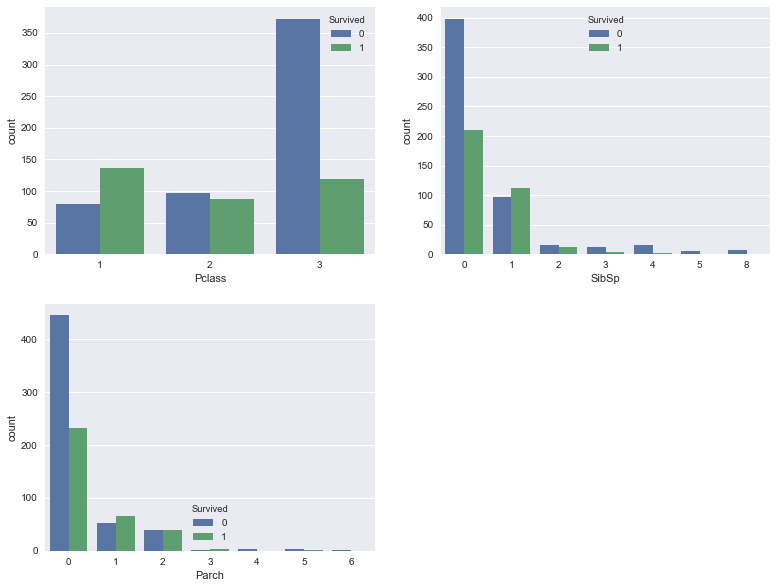

In [10]:
# 整型变量
fig = plt.figure(figsize=(13, 10))
i = 1
for col in columns:
    if col != 'Survived':
        fig.add_subplot(2, 2, i)
        sns.countplot(x=col, data=data_df, hue='Survived')
        i += 1
plt.show()
fig.clear()

船票级别是1级的生还人数多余死亡人数，3级船票的乘客遇难机会很高；  
兄弟姐妹或配偶的人数是1的生还人数多余死亡人数；  
孩子或父母的人数是1，2，3的生还人数多余或等于死亡人数；  
猜测生还率与船票级别，兄弟姐妹或配偶的人数，孩子或父母人数有关系。

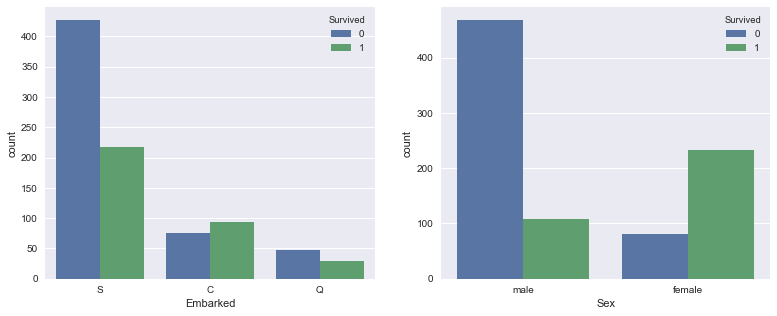

In [11]:
# 文本变量
fig = plt.figure(figsize=(13, 5))
fig.add_subplot(1,2,1)
sns.countplot(x='Embarked', data=data_df, hue='Survived');
fig.add_subplot(1,2,2)
sns.countplot(x='Sex', data=data_df, hue='Survived');
plt.show()
fig.clear()

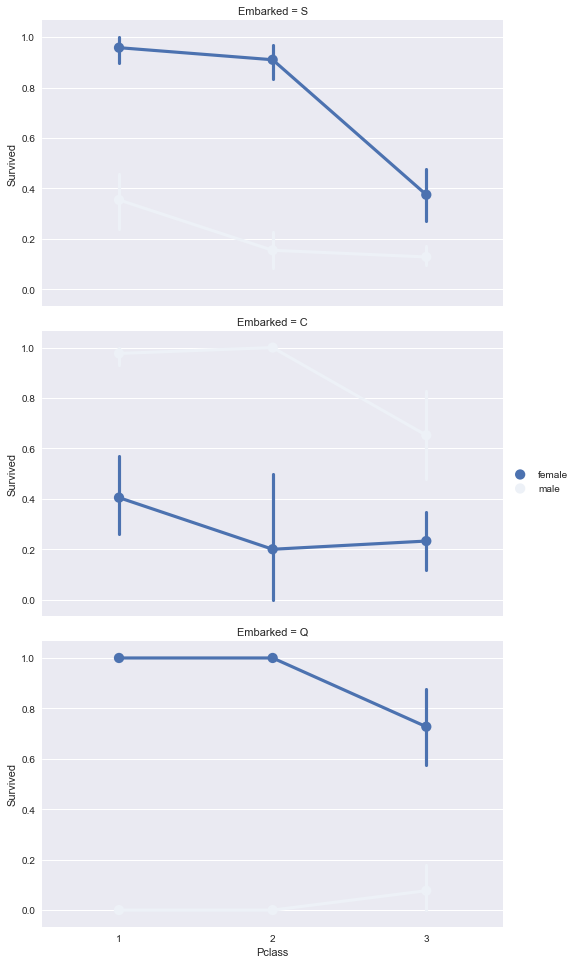

In [12]:
# 进一步探索登船点，票级，性别和生还率的关系
FacetGrid = sns.FacetGrid(data_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

登船地点在C地的生还人数多余死亡人数，而且生还者大部分是男性。其余S和Q地的生还者大部分都是女性。Q地男性票级是3级的生还人数比死亡人数多；  
女性的生还人数明显多余死亡人数，生还率也明显多于男性的生还率；  
猜测生还率与登船地点和性别有关，并且与性别的相关性比较大。

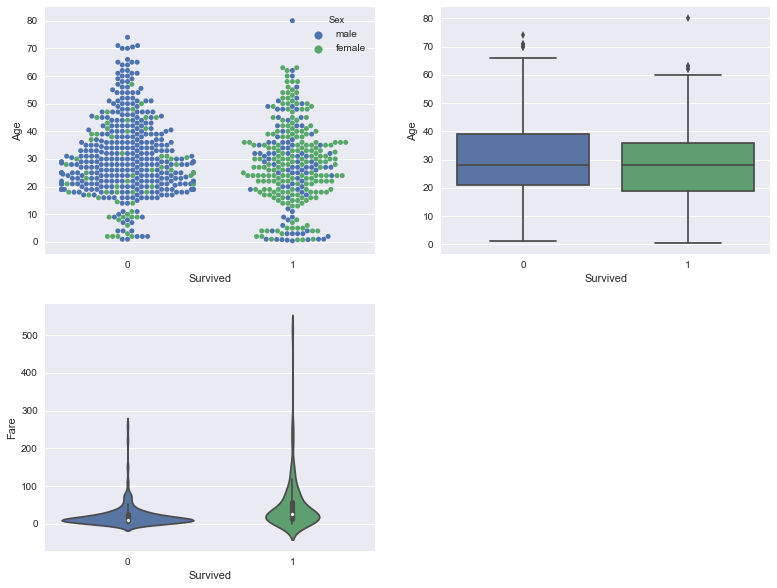

In [13]:
# 浮点型变量
fig = plt.figure(figsize=(13, 10))
# 年龄与生还
fig.add_subplot(2, 2, 1)
sns.swarmplot(x='Survived', y='Age', hue='Sex', data=data_df)
fig.add_subplot(2, 2, 2)
sns.boxplot(x='Survived', y='Age', data=data_df)
# 船费与生还
fig.add_subplot(2, 2, 3)
sns.violinplot(x='Survived', y='Fare', data=data_df)
plt.show()
fig.clear()

生还者的平均年龄低于遇难者的平均年龄，而且年龄最大的乘客生还了；  
生还者的船费普遍高于遇难者的船费，而且船费最高的乘客生还了；  
猜测生还率与年龄，船费有关系。

###  进一步整理数据
进一步整理数据，探索有没有更多因素与生还率相关。
- 浮点型数据分组
- 分组整合创建新标量
- 将文本型数据量化

In [14]:
# 年龄整合
def AgeGroup(age):
    ag = ""
    if age <= 10:
        ag = ":10"
    elif age <= 20:
        ag = "11:20"
    elif age <= 30:
        ag = "21:30"
    elif age <= 40:
        ag = "31:40"
    elif age <= 50:
        ag = "41:50"
    elif age <= 60:
        ag = "51:60"
    elif age <= 60:
        ag = "61:70"
    else:
        ag = "71:"
    return ag
# Mjor or not (I assume the legal age is 18..)
def IsAdult(age):
    if age < 18:
        return 0
    else:
        return 1

data_df["AgeGroup"] = data_df.apply(lambda row: AgeGroup(row["Age"]), axis=1)
data_df["IsAdult"] = data_df.apply(lambda row: IsAdult(row["Age"]), axis=1)
data_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,IsAdult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,21:30,1


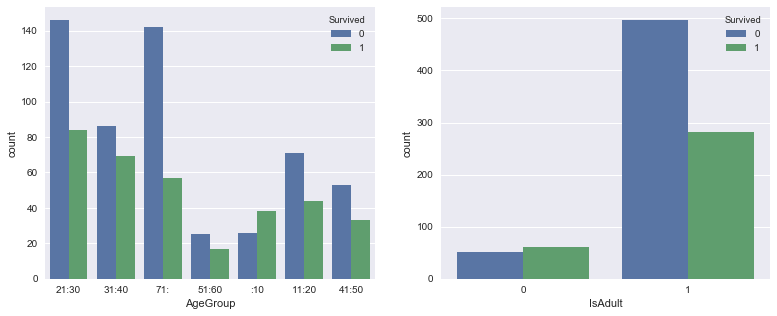

In [15]:
fig = plt.figure(figsize=(13, 5))
fig.add_subplot(1, 2, 1)
sns.countplot(x='AgeGroup', data=data_df, hue='Survived')
fig.add_subplot(1, 2, 2)
sns.countplot(x='IsAdult', data=data_df, hue='Survived')
plt.show()
fig.clear()

具体看生还者的年龄分布，0-10岁的生还率最高，未成年的生还率很高；  
猜测年龄越小，生还率越高。

1    537
0    354
Name: Alone, dtype: int64


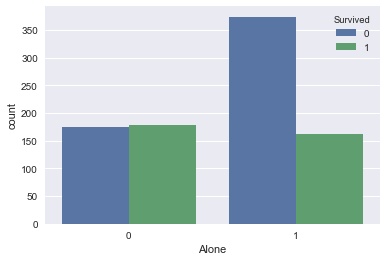

In [16]:
# 船上是否有亲属
data_df["Alone"] = data_df.apply(lambda obs: 1 if np.sum(obs['SibSp']+obs['Parch']) == 0 else 0, axis=1)
print data_df.Alone.value_counts()
# Plot Alone vs Survived
sns.countplot(x='Alone', data=data_df, hue='Survived');
plt.show()

与亲属一起登船的，生还率比独自一人登船的高。

In [17]:
# 称谓
title = ['Mlle','Mrs', 'Mr', 'Miss','Master','Don','Rev','Dr','Mme','Ms','Major','Col','Capt','Countess']
def ExtractTitle(name):
    name = name.replace('.','').split()
    tit = list(set(name) & set(title))
    if len(tit): tit = tit[0]
    else: tit = 'Missing'
    return tit

data_df['Title'] = data_df['Name'].apply(ExtractTitle)
# data_df.head(1)
data_df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Missing       3
Major         2
Col           2
Mlle          2
Countess      1
Ms            1
Don           1
Mme           1
Capt          1
Name: Title, dtype: int64

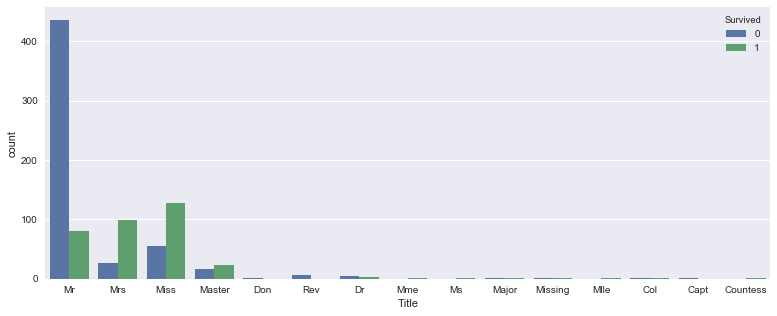

In [18]:
plt.figure(figsize=(13, 5))
sns.countplot(x='Title', data=data_df, hue='Survived')
plt.show()

Mrs, Miss, Master的称谓生还率比较高，这与女性与生还率相关的发现相似。

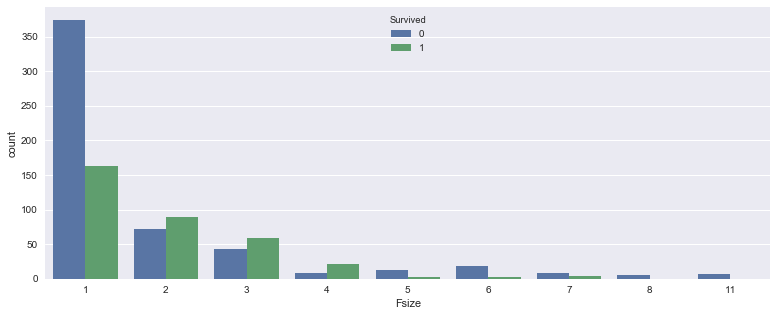

In [19]:
# 船上家庭人数
data_df['Fsize'] = data_df['SibSp'] + data_df['Parch'] + 1
plt.figure(figsize=(13, 5))
sns.countplot(x='Fsize', data=data_df, hue='Survived')
plt.show()

船上家庭人数是2到4的生还率比较高

![titanic decks](http://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/687px-Titanic_cutaway_diagram.png)

In [20]:
# 文本型标量量化
data_quant = data_df.copy()
data_quant.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,IsAdult,Alone,Title,Fsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21:30,1,0,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31:40,1,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21:30,1,1,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31:40,1,0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,31:40,1,1,Mr,1


In [21]:
# 性别量化
data_quant.set_value(data_quant[data_quant['Sex'] == 'male'].index, 'Sex_q', 1)
data_quant.set_value(data_quant[data_quant['Sex'] == 'female'].index, 'Sex_q', 0)

# 船舱量化
def cabin2num(cabin):
    cabin_list = ['A','B','C','D','E','F','G']
    if cabin is np.nan or cabin[0] not in cabin_list:
        cabin = 0
    else:
        cabin = cabin_list.index(cabin[0]) + 1
    return cabin

data_quant['Cabin_q'] = data_quant.Cabin.apply(cabin2num)

# 登船点量化
data_quant.set_value(data_quant[data_quant.Embarked == 'C'].index, 'Embarked_q', 0)
data_quant.set_value(data_quant[data_quant.Embarked == 'Q'].index, 'Embarked_q', 1)
data_quant.set_value(data_quant[data_quant.Embarked == 'S'].index, 'Embarked_q', 2)

# 称谓量化
def title2num(title):
    title_list = ['Mlle','Mrs', 'Mr', 'Miss','Master','Don','Rev','Dr','Mme','Ms','Major','Col','Capt','Countess']
    if title not in title_list:
        title = 0
    else:
        title = title_list.index(title) + 1
    return title

data_quant['Title_q'] = data_quant.Title.apply(title2num)

In [22]:
data_quant.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,AgeGroup,IsAdult,Alone,Title,Fsize,Sex_q,Cabin_q,Embarked_q,Title_q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,21:30,1,0,Mr,2,1.0,0,2.0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,31:40,1,0,Mrs,2,0.0,3,0.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,21:30,1,1,Miss,1,0.0,0,2.0,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,31:40,1,0,Mrs,2,0.0,3,2.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,31:40,1,1,Mr,1,1.0,0,2.0,3


###  各因素之间的相关系数
之前的探索得出是否生还与性别，登船点，船票级别等因素有关系，现计算其各因素之间的相关系数，具体查看那些因素与是否生还的关系比较高。

Survived      1.000000
Cabin_q       0.295812
Fare          0.257307
Parch         0.081629
Title_q       0.042906
Fsize         0.016639
SibSp        -0.035322
Age          -0.077221
IsAdult      -0.122239
Embarked_q   -0.169718
Alone        -0.203367
Pclass       -0.338481
Sex_q        -0.543351
Name: Survived, dtype: float64


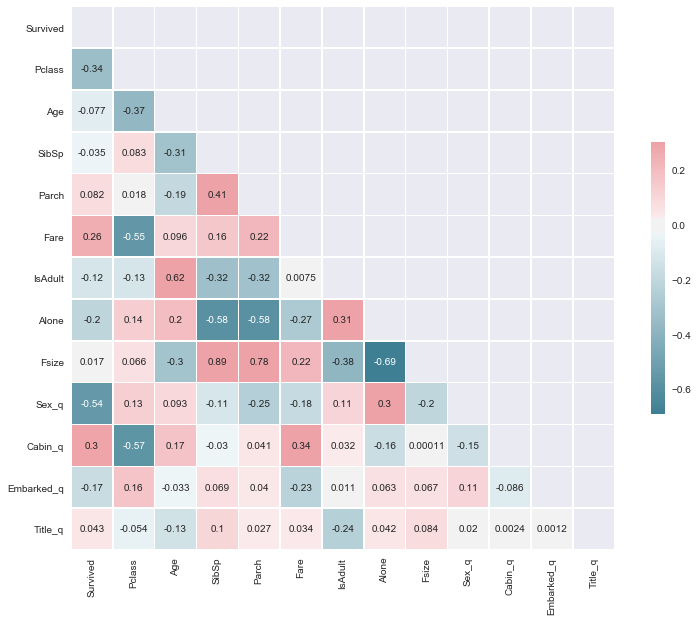

In [23]:
corr = data_quant.drop(['PassengerId'], axis=1).corr() # 相关性
print corr['Survived'].sort_values(ascending=False)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # 下三角矩阵
fig = plt.figure(figsize=(13, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, annot=True, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
fig.clear()

与生还率呈正相关的是船舱号，票价，父母子女人数，称谓，家庭人数；呈负相关的是同辈亲属人数，年龄，是否成年，登船点，是否单独上船，票级别，性别；  
其中与性别的相关性最大，其次是票级别，之后是船舱号，票价，是否单独上船，但船舱号大部分缺失，故其参考意义不大。
## 初步结论
让船上的人生还率更高的因素是性别，票级别，票价。女性，票级别高，票价高，生还率更高。
## 参考资料
- 0 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)
- 1 [TitanicSurvival - DataAnalysis & MachineLearning](https://www.kaggle.com/nicolasdupont/titanicsurvival-dataanalysis-machinelearning)
- 2 [End to End Project with Python](https://www.kaggle.com/niklasdonges/end-to-end-project-with-python)

# 建模分析
待续...